# Task 3

In [1]:
#Allows me to import the modules in the src folder
#Code from https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Part 1

In the first part I will evaluate the performance of CNN built with PyTorch against the Fashion-MNIST dataset.

In [2]:
import math
from time import process_time
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from src.cnn_fashion import *
from src.cnn_cifar import *
from src.confusion_matrix import *

In [3]:
training_data = datasets.FashionMNIST(root="data", train=True, download=True, transform=transforms.ToTensor())
testing_data = datasets.FashionMNIST(root="data", train=False, download=True, transform=transforms.ToTensor())

training_loader = torch.utils.data.DataLoader(training_data, batch_size=100)
testing_loader = torch.utils.data.DataLoader(testing_data, batch_size=100, shuffle=True)

#Set the seed for random number generation
seed = 123
torch.manual_seed(seed)

In [12]:
model_info = pd.DataFrame(columns=["Epochs", 
                                   "Accuracy list", "Final accuracy", 
                                   "Loss list", "Final loss",
                                   "Computation time (seconds)"])

for i in range(5):
    epochs = (i+1)
    model = CNNFashion()

    start = process_time()
    accuracy_list, loss_list = model.fit(training_loader, epochs=epochs, error_function=nn.CrossEntropyLoss(),
                                    optimiser=torch.optim.Adam(model.parameters(), 0.001))
    end = process_time()
    
    model_info.loc[model_info.index.size] = [epochs, 
                                             accuracy_list,
                                             accuracy_list[len(accuracy_list)-1], 
                                             loss_list,
                                             loss_list[len(loss_list)-1],
                                             end - start]

Epoch: 1/1
Iteration: 50 Accuracy: 0.8100 Loss: 0.5638 Computation time: 281.25ms
Iteration: 100 Accuracy: 0.8100 Loss: 0.5029 Computation time: 281.25ms
Iteration: 150 Accuracy: 0.8000 Loss: 0.5097 Computation time: 281.25ms
Iteration: 200 Accuracy: 0.8300 Loss: 0.4040 Computation time: 187.50ms
Iteration: 250 Accuracy: 0.9100 Loss: 0.3272 Computation time: 281.25ms
Iteration: 300 Accuracy: 0.8300 Loss: 0.4117 Computation time: 281.25ms
Iteration: 350 Accuracy: 0.8900 Loss: 0.3990 Computation time: 281.25ms
Iteration: 400 Accuracy: 0.8800 Loss: 0.3516 Computation time: 281.25ms
Iteration: 450 Accuracy: 0.8100 Loss: 0.4966 Computation time: 187.50ms
Iteration: 500 Accuracy: 0.8200 Loss: 0.4480 Computation time: 281.25ms
Iteration: 550 Accuracy: 0.8900 Loss: 0.3192 Computation time: 281.25ms
Iteration: 600 Accuracy: 0.9100 Loss: 0.2638 Computation time: 281.25ms
Epoch computation time: 192.11s

Epoch: 1/2
Iteration: 50 Accuracy: 0.8100 Loss: 0.5647 Computation time: 375.00ms
Iteration: 

Iteration: 100 Accuracy: 0.9100 Loss: 0.1742 Computation time: 281.25ms
Iteration: 150 Accuracy: 0.9300 Loss: 0.2403 Computation time: 281.25ms
Iteration: 200 Accuracy: 0.9000 Loss: 0.2299 Computation time: 281.25ms
Iteration: 250 Accuracy: 0.9300 Loss: 0.1902 Computation time: 281.25ms
Iteration: 300 Accuracy: 0.9100 Loss: 0.2290 Computation time: 281.25ms
Iteration: 350 Accuracy: 0.9200 Loss: 0.1609 Computation time: 281.25ms
Iteration: 400 Accuracy: 0.9100 Loss: 0.2285 Computation time: 281.25ms
Iteration: 450 Accuracy: 0.8800 Loss: 0.4223 Computation time: 375.00ms
Iteration: 500 Accuracy: 0.8800 Loss: 0.2757 Computation time: 281.25ms
Iteration: 550 Accuracy: 0.9500 Loss: 0.1690 Computation time: 281.25ms
Iteration: 600 Accuracy: 0.9300 Loss: 0.1693 Computation time: 281.25ms
Epoch computation time: 204.95s

Epoch: 1/5
Iteration: 50 Accuracy: 0.7900 Loss: 0.5413 Computation time: 281.25ms
Iteration: 100 Accuracy: 0.8100 Loss: 0.4598 Computation time: 281.25ms
Iteration: 150 Accura

<Figure size 640x480 with 0 Axes>

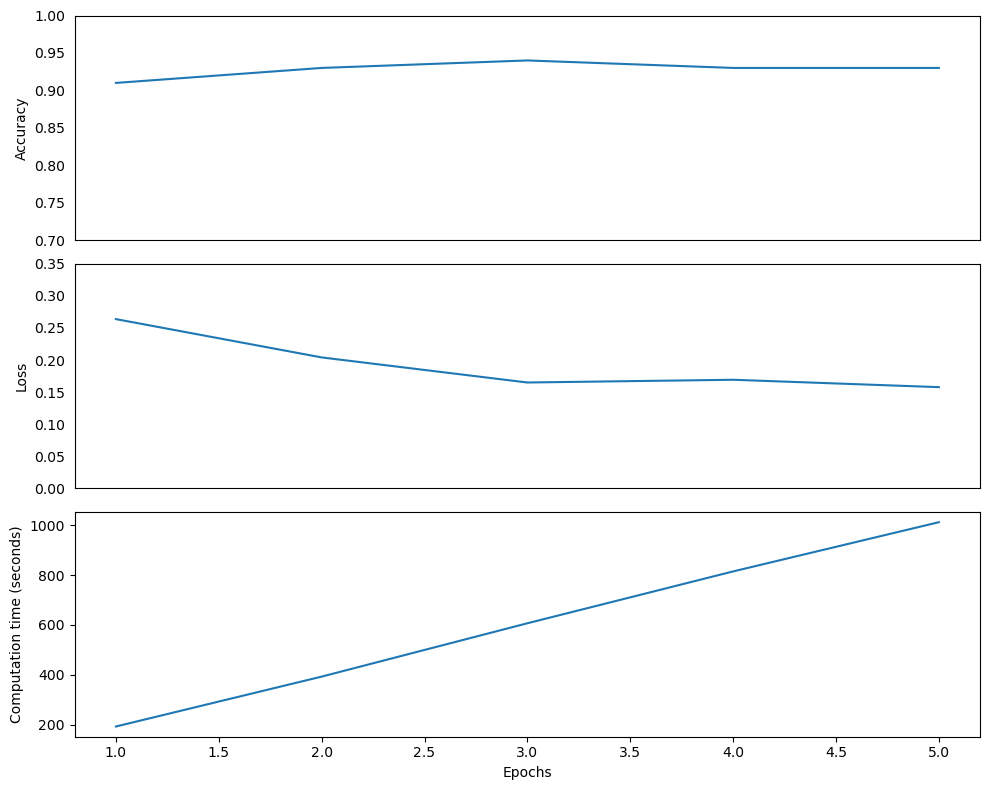

In [14]:
#Create 3 plots stacked vertically
plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

#Display line chart for accuracy
ax1.plot(model_info["Epochs"], model_info["Final accuracy"])
ax1.set_ylabel("Accuracy")

#Set x tick labels off
ax1.set_xticklabels([])
ax1.tick_params(tick1On=False)

ax1.set_ylim(0.7, 1)

#Display line chart for loss
ax2.plot(model_info["Epochs"], model_info["Final loss"])
ax2.set_ylabel("Loss")

#Set x tick labels off
ax2.set_xticklabels([])
ax2.tick_params(tick1On=False)

ax2.set_ylim(0, .35)

#Display line chart for computation time
ax3.plot(model_info["Epochs"], model_info["Computation time (seconds)"])
ax3.set_ylabel("Computation time (seconds)")

ax3.set_xlabel("Epochs")

plt.tight_layout() 

In [6]:
model_info = pd.DataFrame(columns=["Learning rate", 
                                   "Accuracy list", "Final accuracy", 
                                   "Loss list", "Final loss",
                                   "Computation time (seconds)"])

#learning_rates = [.0001, .0005, .001, .002, .003, .005, .01]
learning_rates = [.0001, .005, .01]
for learning_rate in learning_rates:
    model = CNNFashion()

    start = process_time()
    accuracy_list, loss_list = model.fit(training_loader, epochs=5, error_function=nn.CrossEntropyLoss(),
                                    optimiser=torch.optim.Adam(model.parameters(), learning_rate))
    end = process_time()
    
    model_info.loc[model_info.index.size] = [learning_rate, 
                                             accuracy_list,
                                             accuracy_list[len(accuracy_list)-1], 
                                             loss_list,
                                             loss_list[len(loss_list)-1],
                                             end - start]

Epoch: 1/5
Iteration: 50 Accuracy: 0.7000 Loss: 1.1042 Computation time: 250.00ms
Iteration: 100 Accuracy: 0.6300 Loss: 0.8315 Computation time: 281.25ms
Iteration: 150 Accuracy: 0.7000 Loss: 0.8197 Computation time: 375.00ms
Iteration: 200 Accuracy: 0.7000 Loss: 0.8333 Computation time: 265.62ms
Iteration: 250 Accuracy: 0.8400 Loss: 0.5291 Computation time: 281.25ms
Iteration: 300 Accuracy: 0.8100 Loss: 0.5102 Computation time: 375.00ms
Iteration: 350 Accuracy: 0.8300 Loss: 0.6171 Computation time: 281.25ms
Iteration: 400 Accuracy: 0.8100 Loss: 0.5320 Computation time: 265.62ms
Iteration: 450 Accuracy: 0.7600 Loss: 0.7345 Computation time: 281.25ms
Iteration: 500 Accuracy: 0.8000 Loss: 0.5583 Computation time: 265.62ms
Iteration: 550 Accuracy: 0.8200 Loss: 0.5176 Computation time: 375.00ms
Iteration: 600 Accuracy: 0.8500 Loss: 0.4309 Computation time: 359.38ms
Epoch computation time: 231.73s

Epoch: 2/5
Iteration: 50 Accuracy: 0.8500 Loss: 0.4453 Computation time: 281.25ms
Iteration: 

Iteration: 100 Accuracy: 0.9200 Loss: 0.1849 Computation time: 281.25ms
Iteration: 150 Accuracy: 0.9500 Loss: 0.2064 Computation time: 281.25ms
Iteration: 200 Accuracy: 0.9000 Loss: 0.2052 Computation time: 375.00ms
Iteration: 250 Accuracy: 0.9300 Loss: 0.2256 Computation time: 281.25ms
Iteration: 300 Accuracy: 0.9500 Loss: 0.2234 Computation time: 250.00ms
Iteration: 350 Accuracy: 0.9100 Loss: 0.2128 Computation time: 265.62ms
Iteration: 400 Accuracy: 0.9100 Loss: 0.2493 Computation time: 281.25ms
Iteration: 450 Accuracy: 0.8600 Loss: 0.4562 Computation time: 375.00ms
Iteration: 500 Accuracy: 0.8800 Loss: 0.3070 Computation time: 281.25ms
Iteration: 550 Accuracy: 0.9300 Loss: 0.1975 Computation time: 281.25ms
Iteration: 600 Accuracy: 0.9300 Loss: 0.1742 Computation time: 265.62ms
Epoch computation time: 228.16s

Epoch: 1/5
Iteration: 50 Accuracy: 0.8200 Loss: 0.5542 Computation time: 265.62ms
Iteration: 100 Accuracy: 0.8000 Loss: 0.5409 Computation time: 265.62ms
Iteration: 150 Accura

Iteration: 150 Accuracy: 0.9500 Loss: 0.2225 Computation time: 375.00ms
Iteration: 200 Accuracy: 0.9100 Loss: 0.2640 Computation time: 375.00ms
Iteration: 250 Accuracy: 0.9000 Loss: 0.2362 Computation time: 359.38ms
Iteration: 300 Accuracy: 0.9300 Loss: 0.2178 Computation time: 375.00ms
Iteration: 350 Accuracy: 0.9800 Loss: 0.1445 Computation time: 281.25ms
Iteration: 400 Accuracy: 0.9300 Loss: 0.2573 Computation time: 375.00ms
Iteration: 450 Accuracy: 0.8700 Loss: 0.4166 Computation time: 359.38ms
Iteration: 500 Accuracy: 0.9400 Loss: 0.2354 Computation time: 265.62ms
Iteration: 550 Accuracy: 0.9100 Loss: 0.2030 Computation time: 375.00ms
Iteration: 600 Accuracy: 0.9400 Loss: 0.1298 Computation time: 281.25ms
Epoch computation time: 230.55s

Epoch: 5/5
Iteration: 50 Accuracy: 0.9200 Loss: 0.2167 Computation time: 359.38ms
Iteration: 100 Accuracy: 0.9600 Loss: 0.1436 Computation time: 359.38ms
Iteration: 150 Accuracy: 0.9500 Loss: 0.1883 Computation time: 375.00ms
Iteration: 200 Accura

Iteration: 200 Accuracy: 0.8600 Loss: 0.2855 Computation time: 250.00ms
Iteration: 250 Accuracy: 0.9100 Loss: 0.2351 Computation time: 250.00ms
Iteration: 300 Accuracy: 0.8800 Loss: 0.2581 Computation time: 359.38ms
Iteration: 350 Accuracy: 0.8800 Loss: 0.2408 Computation time: 234.38ms
Iteration: 400 Accuracy: 0.9100 Loss: 0.2763 Computation time: 265.62ms
Iteration: 450 Accuracy: 0.8900 Loss: 0.3915 Computation time: 281.25ms
Iteration: 500 Accuracy: 0.8800 Loss: 0.3615 Computation time: 281.25ms
Iteration: 550 Accuracy: 0.9000 Loss: 0.2519 Computation time: 265.62ms
Iteration: 600 Accuracy: 0.9100 Loss: 0.2893 Computation time: 375.00ms
Epoch computation time: 228.66s

Epoch: 4/5
Iteration: 50 Accuracy: 0.9300 Loss: 0.2110 Computation time: 281.25ms
Iteration: 100 Accuracy: 0.9200 Loss: 0.1916 Computation time: 265.62ms
Iteration: 150 Accuracy: 0.9000 Loss: 0.2343 Computation time: 359.38ms
Iteration: 200 Accuracy: 0.8700 Loss: 0.3246 Computation time: 359.38ms
Iteration: 250 Accura

<Figure size 640x480 with 0 Axes>

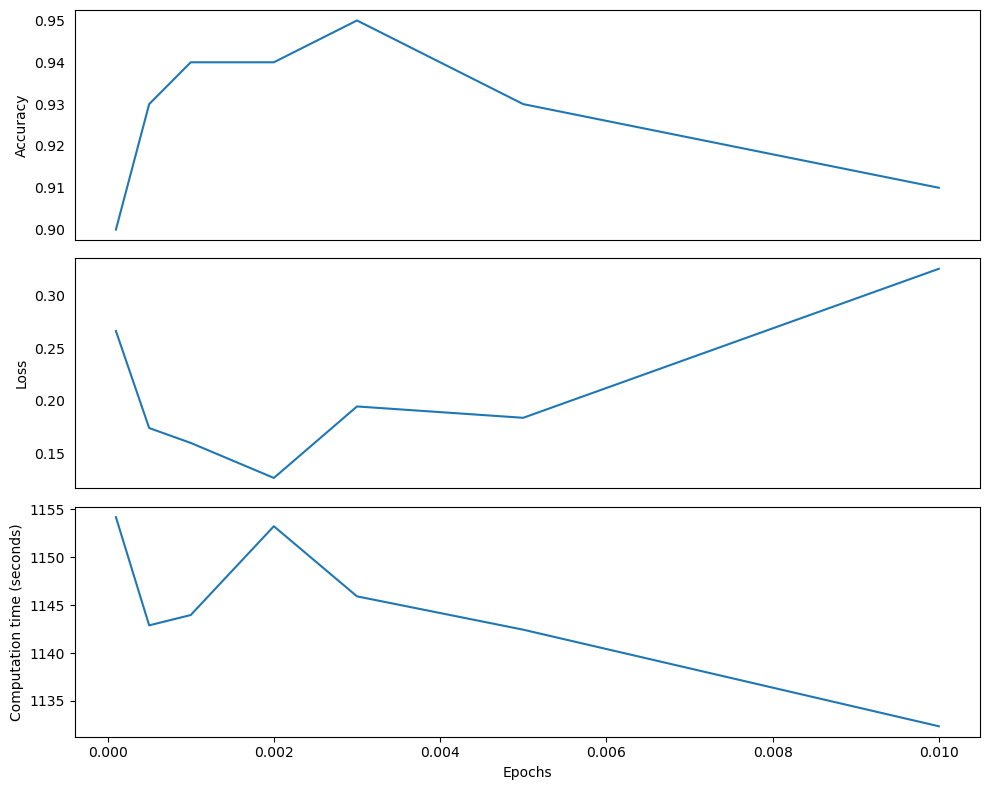

In [7]:
#Create 3 plots stacked vertically
plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

#Display line chart for accuracy
ax1.plot(model_info["Learning rate"], model_info["Final accuracy"])
ax1.set_ylabel("Accuracy")

#Set x tick labels off
ax1.set_xticklabels([])
ax1.tick_params(tick1On=False)

#Display line chart for loss
ax2.plot(model_info["Learning rate"], model_info["Final loss"])
ax2.set_ylabel("Loss")

#Set x tick labels off
ax2.set_xticklabels([])
ax2.tick_params(tick1On=False)

#Display line chart for computation time
ax3.plot(model_info["Learning rate"], model_info["Computation time (seconds)"])
ax3.set_ylabel("Computation time (seconds)")

ax3.set_xlabel("Learning rate")

plt.tight_layout() 

Epoch: 1/3
Iteration: 50 Accuracy: 0.7800 Loss: 0.5627 Computation time: 281.25ms
Iteration: 100 Accuracy: 0.8400 Loss: 0.4385 Computation time: 281.25ms
Iteration: 150 Accuracy: 0.8400 Loss: 0.4361 Computation time: 281.25ms
Iteration: 200 Accuracy: 0.8600 Loss: 0.3928 Computation time: 187.50ms
Iteration: 250 Accuracy: 0.8800 Loss: 0.3155 Computation time: 281.25ms
Iteration: 300 Accuracy: 0.8800 Loss: 0.3376 Computation time: 281.25ms
Iteration: 350 Accuracy: 0.8900 Loss: 0.3217 Computation time: 281.25ms
Iteration: 400 Accuracy: 0.8800 Loss: 0.3247 Computation time: 281.25ms
Iteration: 450 Accuracy: 0.8300 Loss: 0.5299 Computation time: 187.50ms
Iteration: 500 Accuracy: 0.8400 Loss: 0.3943 Computation time: 281.25ms
Iteration: 550 Accuracy: 0.9100 Loss: 0.2768 Computation time: 281.25ms
Iteration: 600 Accuracy: 0.9200 Loss: 0.2394 Computation time: 281.25ms
Epoch computation time: 192.23s

Epoch: 2/3
Iteration: 50 Accuracy: 0.9100 Loss: 0.2502 Computation time: 281.25ms
Iteration: 

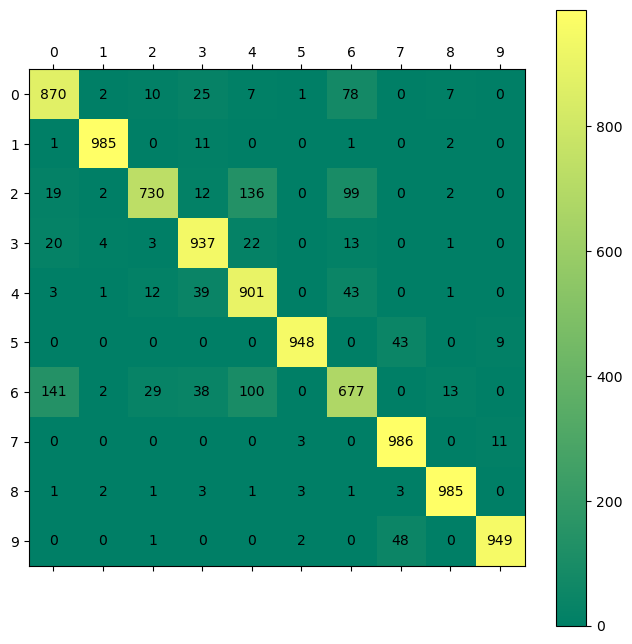

In [15]:
model = CNNFashion()
model.fit(training_loader, epochs=3, error_function=nn.CrossEntropyLoss(),
          optimiser=torch.optim.Adam(model.parameters(), 0.002))

predictions, labels = model.predict(testing_loader, error_function=nn.CrossEntropyLoss())

confusion_matrix = confusion_matrix(predictions.numpy(), labels.numpy())

## Part 2

In the second part I will evaluate the performance of CNN built with PyTorch against the CIFAR-10 dataset.

In [16]:
training_data = datasets.CIFAR10(root="data", train=True, download=True, transform=transforms.ToTensor())
testing_data = datasets.CIFAR10(root="data", train=False, download=True, transform=transforms.ToTensor())

training_loader = torch.utils.data.DataLoader(training_data, batch_size=100)
testing_loader = torch.utils.data.DataLoader(testing_data, batch_size=100, shuffle=True)

#Set the seed for random number generation
seed = 123
torch.manual_seed(seed)

Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/1
Iteration: 50 Accuracy: 0.3900 Loss: 1.6708 Computation time: 562.50ms
Iteration: 100 Accuracy: 0.5400 Loss: 1.3028 Computation time: 562.50ms
Iteration: 150 Accuracy: 0.5800 Loss: 1.2290 Computation time: 562.50ms
Iteration: 200 Accuracy: 0.6000 Loss: 1.2530 Computation time: 468.75ms
Iteration: 250 Accuracy: 0.6800 Loss: 0.9671 Computation time: 468.75ms
Iteration: 300 Accuracy: 0.7500 Loss: 0.7534 Computation time: 562.50ms
Iteration: 350 Accuracy: 0.6300 Loss: 0.9843 Computation time: 562.50ms
Iteration: 400 Accuracy: 0.7600 Loss: 0.7560 Computation time: 656.25ms
Iteration: 450 Accuracy: 0.7000 Loss: 0.9203 Computation time: 562.50ms
Iteration: 500 Accuracy: 0.7000 Loss: 0.8591 Computation time: 562.50ms
Epoch computation time: 306.45s



In [17]:
model_info = pd.DataFrame(columns=["Epochs", 
                                   "Accuracy list", "Final accuracy", 
                                   "Loss list", "Final loss",
                                   "Computation time (seconds)"])

for i in range(4):
    epochs = (i+1)
    model = CNNCIFAR()

    start = process_time()
    accuracy_list, loss_list = model.fit(training_loader, epochs=epochs, error_function=nn.CrossEntropyLoss(),
                                    optimiser=torch.optim.Adam(model.parameters(), 0.001))
    end = process_time()
    
    model_info.loc[model_info.index.size] = [epochs, 
                                             accuracy_list,
                                             accuracy_list[len(accuracy_list)-1], 
                                             loss_list,
                                             loss_list[len(loss_list)-1],
                                             end - start]

Epoch: 1/1
Iteration: 50 Accuracy: 0.3500 Loss: 1.9307 Computation time: 562.50ms
Iteration: 100 Accuracy: 0.5500 Loss: 1.3437 Computation time: 562.50ms
Iteration: 150 Accuracy: 0.5300 Loss: 1.2830 Computation time: 468.75ms
Iteration: 200 Accuracy: 0.6700 Loss: 0.9948 Computation time: 468.75ms
Iteration: 250 Accuracy: 0.7000 Loss: 1.0365 Computation time: 656.25ms
Iteration: 300 Accuracy: 0.7000 Loss: 0.8007 Computation time: 562.50ms
Iteration: 350 Accuracy: 0.6000 Loss: 1.0703 Computation time: 562.50ms
Iteration: 400 Accuracy: 0.7800 Loss: 0.7748 Computation time: 562.50ms
Iteration: 450 Accuracy: 0.7000 Loss: 0.9222 Computation time: 562.50ms
Iteration: 500 Accuracy: 0.6800 Loss: 0.9928 Computation time: 546.88ms
Epoch computation time: 316.50s

Epoch: 1/2
Iteration: 50 Accuracy: 0.3500 Loss: 1.8888 Computation time: 562.50ms
Iteration: 100 Accuracy: 0.5300 Loss: 1.2918 Computation time: 562.50ms
Iteration: 150 Accuracy: 0.5900 Loss: 1.1771 Computation time: 562.50ms
Iteration: 

<Figure size 640x480 with 0 Axes>

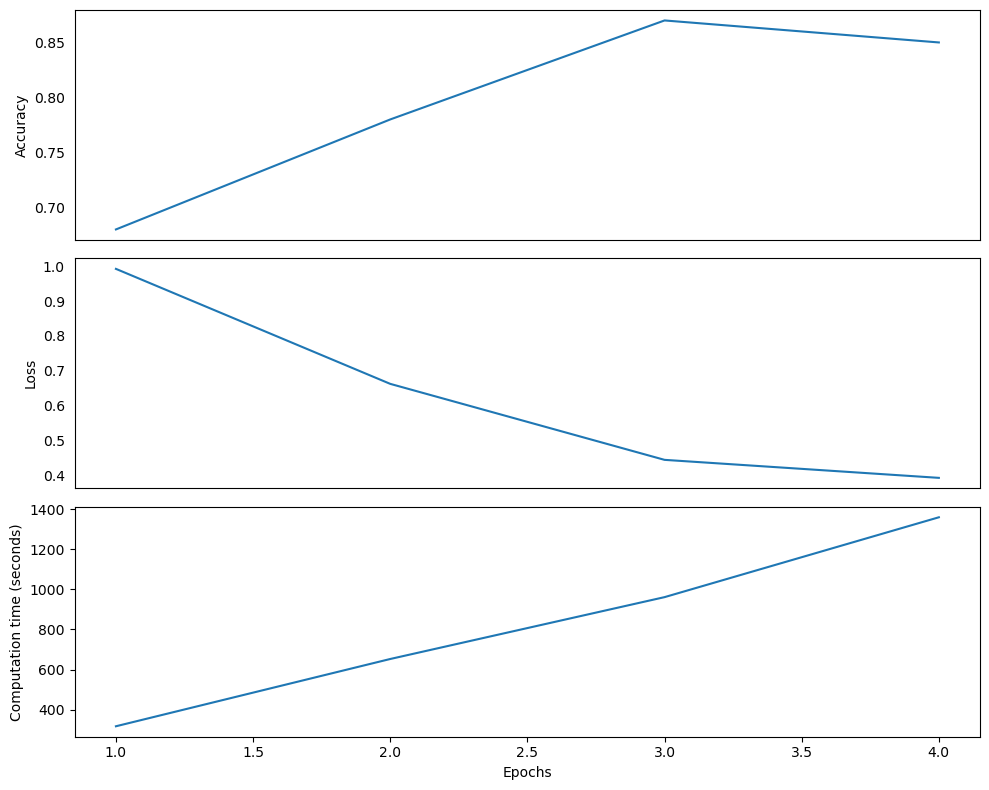

In [18]:
#Create 3 plots stacked vertically
plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

#Display line chart for accuracy
ax1.plot(model_info["Epochs"], model_info["Final accuracy"])
ax1.set_ylabel("Accuracy")

#Set x tick labels off
ax1.set_xticklabels([])
ax1.tick_params(tick1On=False)

#Display line chart for loss
ax2.plot(model_info["Epochs"], model_info["Final loss"])
ax2.set_ylabel("Loss")

#Set x tick labels off
ax2.set_xticklabels([])
ax2.tick_params(tick1On=False)

#Display line chart for computation time
ax3.plot(model_info["Epochs"], model_info["Computation time (seconds)"])
ax3.set_ylabel("Computation time (seconds)")

ax3.set_xlabel("Epochs")

plt.tight_layout() 

In [20]:
model_info = pd.DataFrame(columns=["Learning rate", 
                                   "Accuracy list", "Final accuracy", 
                                   "Loss list", "Final loss",
                                   "Computation time (seconds)"])

learning_rates = [.0005, .001, .005, .01]
for learning_rate in learning_rates:
    model = CNNCIFAR()

    start = process_time()
    accuracy_list, loss_list = model.fit(training_loader, epochs=3, error_function=nn.CrossEntropyLoss(),
                                    optimiser=torch.optim.Adam(model.parameters(), learning_rate))
    end = process_time()
    
    model_info.loc[model_info.index.size] = [learning_rate, 
                                             accuracy_list,
                                             accuracy_list[len(accuracy_list)-1], 
                                             loss_list,
                                             loss_list[len(loss_list)-1],
                                             end - start]

Epoch: 1/3
Iteration: 50 Accuracy: 0.3900 Loss: 1.7139 Computation time: 562.50ms
Iteration: 100 Accuracy: 0.5600 Loss: 1.1425 Computation time: 562.50ms
Iteration: 150 Accuracy: 0.6100 Loss: 1.1449 Computation time: 546.88ms
Iteration: 200 Accuracy: 0.6800 Loss: 0.9609 Computation time: 562.50ms
Iteration: 250 Accuracy: 0.6800 Loss: 0.8966 Computation time: 468.75ms
Iteration: 300 Accuracy: 0.7700 Loss: 0.6740 Computation time: 562.50ms
Iteration: 350 Accuracy: 0.6500 Loss: 1.0476 Computation time: 562.50ms
Iteration: 400 Accuracy: 0.6900 Loss: 0.8197 Computation time: 562.50ms
Iteration: 450 Accuracy: 0.7400 Loss: 0.8533 Computation time: 562.50ms
Iteration: 500 Accuracy: 0.7500 Loss: 0.7406 Computation time: 562.50ms
Epoch computation time: 328.64s

Epoch: 2/3
Iteration: 50 Accuracy: 0.6500 Loss: 0.9108 Computation time: 656.25ms
Iteration: 100 Accuracy: 0.7500 Loss: 0.6990 Computation time: 562.50ms
Iteration: 150 Accuracy: 0.7000 Loss: 0.8002 Computation time: 562.50ms
Iteration: 

Iteration: 450 Accuracy: 0.6200 Loss: 0.9743 Computation time: 656.25ms
Iteration: 500 Accuracy: 0.6400 Loss: 0.9930 Computation time: 562.50ms
Epoch computation time: 334.95s

Epoch: 3/3
Iteration: 50 Accuracy: 0.6100 Loss: 1.1261 Computation time: 562.50ms
Iteration: 100 Accuracy: 0.4600 Loss: 1.6345 Computation time: 562.50ms
Iteration: 150 Accuracy: 0.6000 Loss: 1.1060 Computation time: 656.25ms
Iteration: 200 Accuracy: 0.5500 Loss: 1.2694 Computation time: 562.50ms
Iteration: 250 Accuracy: 0.6000 Loss: 1.1682 Computation time: 562.50ms
Iteration: 300 Accuracy: 0.8000 Loss: 0.6919 Computation time: 562.50ms
Iteration: 350 Accuracy: 0.6900 Loss: 1.0194 Computation time: 562.50ms
Iteration: 400 Accuracy: 0.7500 Loss: 0.7425 Computation time: 656.25ms
Iteration: 450 Accuracy: 0.7500 Loss: 0.8015 Computation time: 562.50ms
Iteration: 500 Accuracy: 0.7300 Loss: 0.9548 Computation time: 562.50ms
Epoch computation time: 335.44s



<Figure size 640x480 with 0 Axes>

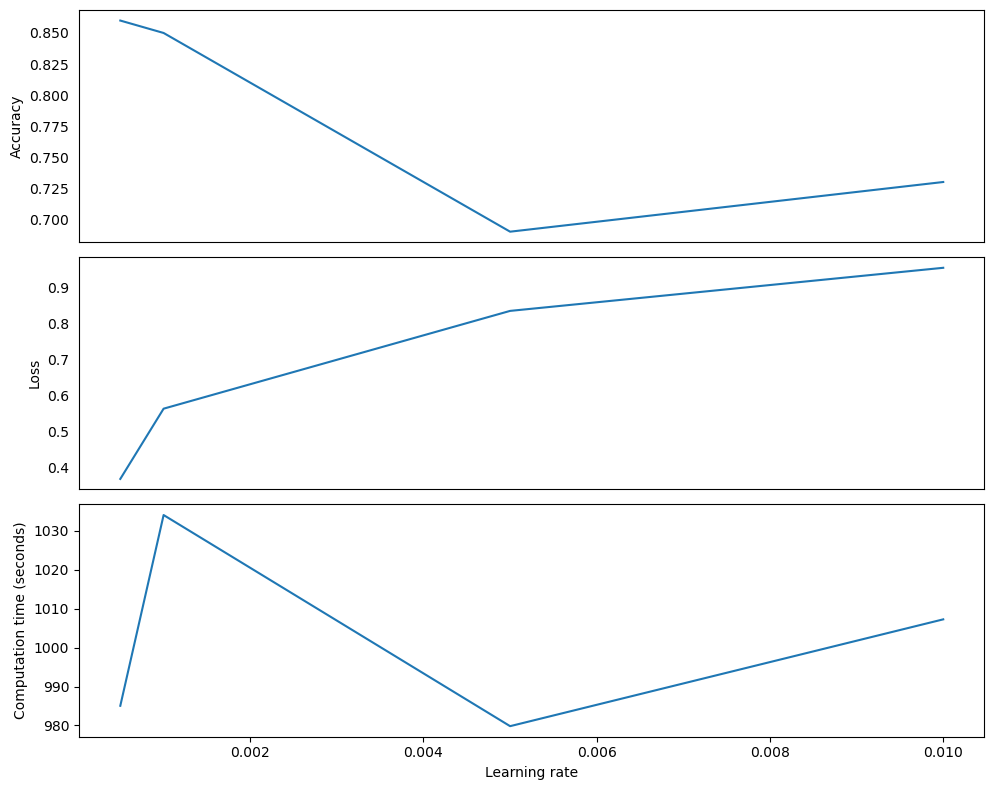

In [21]:
#Create 3 plots stacked vertically
plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

#Display line chart for accuracy
ax1.plot(model_info["Learning rate"], model_info["Final accuracy"])
ax1.set_ylabel("Accuracy")

#Set x tick labels off
ax1.set_xticklabels([])
ax1.tick_params(tick1On=False)

#Display line chart for loss
ax2.plot(model_info["Learning rate"], model_info["Final loss"])
ax2.set_ylabel("Loss")

#Set x tick labels off
ax2.set_xticklabels([])
ax2.tick_params(tick1On=False)

#Display line chart for computation time
ax3.plot(model_info["Learning rate"], model_info["Computation time (seconds)"])
ax3.set_ylabel("Computation time (seconds)")

ax3.set_xlabel("Learning rate")

plt.tight_layout() 

In [ ]:
model = CNNCIFAR()
model.fit(training_loader, epochs=3, error_function=nn.CrossEntropyLoss(),
          optimiser=torch.optim.Adam(model.parameters(), 0.002))

predictions, labels = model.predict(testing_loader, error_function=nn.CrossEntropyLoss())

confusion_matrix = confusion_matrix(predictions.numpy(), labels.numpy())